In [1]:
import cv2
import numpy as np
from utils import *
import os 
from natsort import natsorted
import matplotlib.pyplot as plt

In [2]:
## define global variables 

images_path = 'images/'
depth_maps_path = 'depth_maps/'

images_dataset = []
depth_maps_dataset = []

K = np.load('camera_mat.npy')

In [3]:
for i,d in zip(natsorted(os.listdir(images_path)), natsorted(os.listdir(depth_maps_path))):
    
    img = cv2.imread(images_path + i)
    depth = np.load(depth_maps_path + d)
    depth = depth.astype(np.float64)
    
    images_dataset.append(img)
    depth_maps_dataset.append(depth)


In [4]:
# Extract all features from the dataset 

kp_list, des_list = extract_features_dataset(images_dataset, extract_features)

In [5]:
matches = match_features_dataset(des_list, match_features)

In [6]:
dist_threshold = 0.8

filtered_matches = filter_matches_dataset(filter_matches_distance, matches, dist_threshold)


if len(filtered_matches) > 0:
    
    # Make sure that this variable is set to True if you want to use filtered matches further in your assignment
    is_main_filtered_m = True
    if is_main_filtered_m: 
        matches = filtered_matches

    i = 0
    print("Number of filtered matches in frames {0} and {1}: {2}".format(i, i+1, len(filtered_matches[i])))

Number of filtered matches in frames 0 and 1: 549


In [7]:
# i = 30 

# match = matches[i]
# depth = depth_maps_dataset[i]

# rmat, tvec, image1_pts, image2_pts = estimate_motion(match, kp_list[i], kp_list[i+1], K, depth)

In [11]:
# image_move = visualize_camera_movement(images_dataset[i], image1_pts, images_dataset[i+1] , image2_pts, is_show_img_after_move=False)

In [7]:
plt.figure(figsize=(10,15))
plt.imshow(image_move)

NameError: name 'image_move' is not defined

<Figure size 720x1080 with 0 Axes>

In [8]:
trajectory = estimate_trajectory(estimate_motion, matches, kp_list, K, depth_maps_dataset)

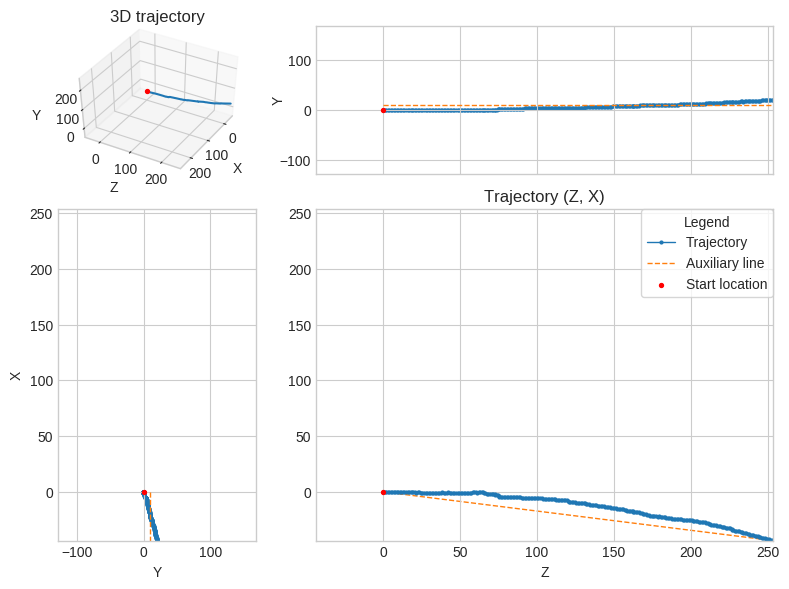

In [16]:
visualize_trajectory(trajectory/1)